<a href="https://colab.research.google.com/github/HammadN98/pytorch/blob/main/03_pytorch_visao_computacional_exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Sep 11 23:12:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'


2.4.0+cu121


## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
# Carros autonomos
# Diagnosticos medicos
# reconhecimento facial

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [4]:
#E quando ao aprender demasiado com os dados de treinamento, o modelo perde a capacidade de generalizacao para novos dados.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
#Data Augmentation criacao e mais dados de maneira artifical
# Dropout Desliga de maneira aleatoria certos neuronios, para o modelo nao depender sempre destes
# Early-Stop PArada antes de a loss do treinamento comecar a deteriorar


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [6]:
##DEu

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [7]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms

train_dataset = torchvision.datasets.MNIST('.',
                                           train=True,
                                           download=True,
                                           transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST('.',
                                         train=False,
                                         download=True,
                                         transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16061669.28it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 495495.20it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1392014.23it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11011866.34it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [8]:
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [9]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [10]:
print(f"Imagem: {train_dataset[0][0]}")
print(f"Classe: {train_dataset[0][1]}")

Imagem: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [11]:
class_names = train_dataset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

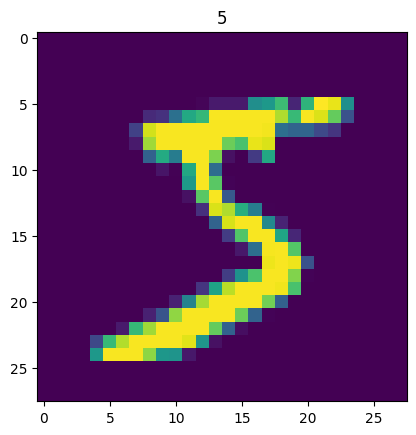

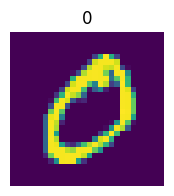

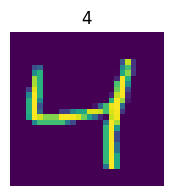

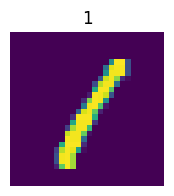

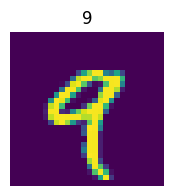

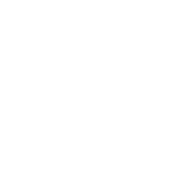

In [12]:
import matplotlib.pyplot as plt
for i in range (5):
  plt.imshow(train_dataset[i][0].squeeze())
  plt.title(train_dataset[i][1])
  plt.figure(figsize=(2, 2))
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [13]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
from torch import nn

In [15]:
class TinyVGG(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.conv_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_features, out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_features)
    )
  def forward(self, x):
    x = self.conv_1(x)
    print(x.shape)
    x = self.conv_2(x)
    print(x)
    x = self.classifier(x)
    print(x.shape)
    return x

modelo = TinyVGG(input_features=1,
                 output_features=10,
                 hidden_units=10)


## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [16]:
# Criando a funcao de perda e otimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(modelo.parameters(), lr=0.1)

In [17]:
epochs = 5

for epoch in range(epochs):
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    #Forward pass
    modelo.train()
    logits = modelo(X)

    # Loss
    loss = loss_fn(logits, y)
    train_loss += loss
    #Zero grad
    modelo.zero_grad()

    #loss.bakward
    loss.backward()

    optimizer.step()

  #Loss por bath
  train_loss /= len(train_dataloader)

  #TEst
  #eval
  modelo.eval()

  test_loss_total = 0
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      test_logits = modelo(X_test)
      test_loss = loss_fn(test_logits, y_test)

      test_loss_total += test_loss

    test_loss_total /= len(test_dataloader)

    # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

A saída de streaming foi truncada nas últimas 5000 linhas.
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 1.2444e-01,  ..., 0.0000e+00,
           1.3683e+00, 0.0000e+00],
          [3.5645e-01, 0.0000e+00, 7.8161e-01,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00]]],


        ...,


        [[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.7897e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.6935e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 1.0917e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 3.8514e+00, 3.7824e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [7.9407e-01, 2.4949e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

torch.Size([1, 10, 14, 14])
tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [2.5633e+00, 2.0070e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.1621e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.2995e-01, 2.9184e-01, 0.0000e+00, 2.6114e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 2.9972e+00, 3.4409e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 1.3720e+00, 2.6008e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [3.3514e-03, 1.3391e+00, 0.0000e+00, 0.0000e+00, 3.5637e-02,
           0.0000e+00, 0.0000e+00]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           4.7312e-01, 0.0000e+00],
       

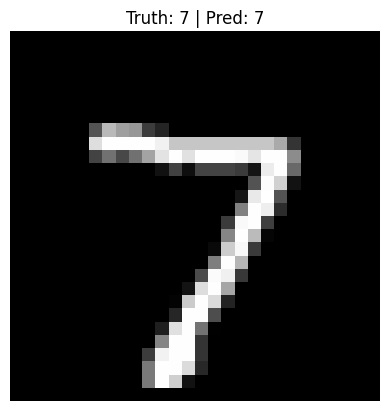

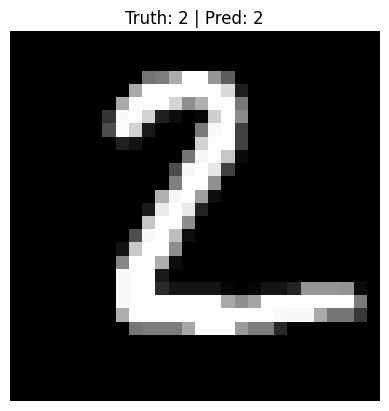

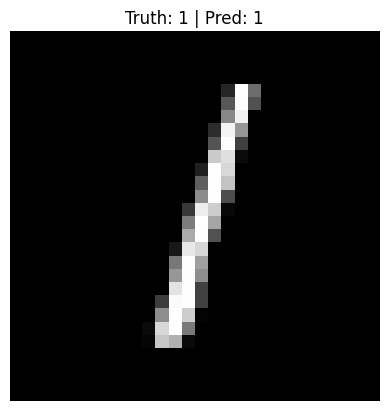

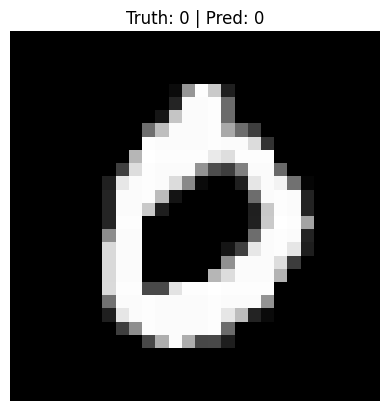

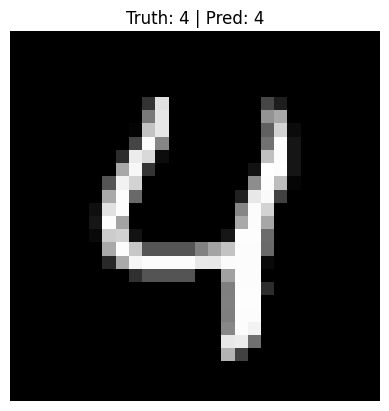

In [18]:
pot = 5
for i in range(pot):
  imagem = test_dataset[i][0]
  label = test_dataset[i][1]

  ##predicoes na imagem
  pred_logits = modelo(imagem.unsqueeze(dim=0))
  pred_probs = torch.softmax(pred_logits, dim=1)
  pred_label = torch.argmax(pred_probs, dim=1)

  # Imagens
  plt.figure()
  plt.imshow(imagem.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {pred_label.item()}")
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [19]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 21.7 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [20]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


In [ ]:
# Make predictions across all test data
from tqdm.auto import tqdm
modelo.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    #X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = modelo(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)


In [24]:
test_dataset.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

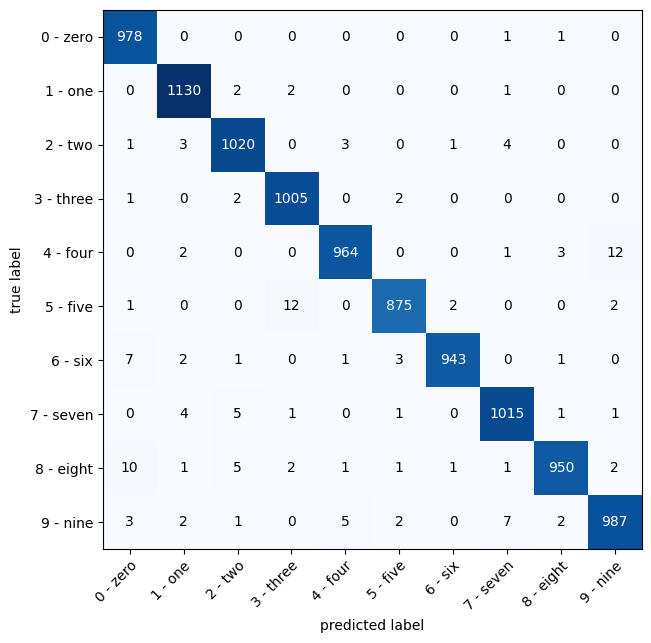

In [25]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_dataset.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [26]:
dados = torch.rand([1, 3, 64, 64])
conv2 = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=10,
                       stride=2,
                       padding=1)
conv2(dados).shape

torch.Size([1, 64, 29, 29])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [30]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

treino = datasets.FashionMNIST(root='.',
                               train=True,
                               download=True,
                               transform=ToTensor()
                               )
teste = datasets.FashionMNIST(root='.',
                              train=False,
                              download=True,
                              transform=ToTensor())

In [32]:
classes = treino.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [39]:
from torch.utils.data import DataLoader

treino_loader = DataLoader(treino, batch_size=32, shuffle=True)
teste_loader = DataLoader(teste, batch_size=32, shuffle=False)
len(treino_loader), len(teste_loader)

(1875, 313)

In [40]:
modelo2 = TinyVGG(input_features=3,
                  output_features=10,
                  hidden_units=10)

In [44]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=modelo2.parameters())

In [48]:
import tqdm
from torchmetrics import Accuracy
acc_fn = Accuracy(task='multiclass', num_classes=9)